In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
df = pd.read_csv(r"C:\Users\User\Desktop\Machine_Learning\cardekho.csv")
print (df.head())

#name - This is the type of car
#year - This is the year in which it was manufactured
#selling_price- This is how much the car goes for/market value
#km_driven- Distance it has covered since it was bought
#fuel- The type of fuel used to power car engine 
#seller type- Who is selling the vehicle 
#transmission- System that transfers power from th engine to the wheels
#Owner - The number of people the car has been sold to
#Mileage - The number of km the car can cover with 1l/kg of fuel
#Engine- Total volume of cylinders 
#max_power- Highest amount of power te engine can produce
#seats- How many passengers can be carried in that vehicle


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1    103.52    5.0  
2        78    5.0  
3        90    5.0  
4      88.2

In [46]:
# Number of missing values per column
missing_count = df.isnull().sum()

# Percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into one table
missing_data = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percentage
})

print(missing_data)


                    Missing Values  Percentage (%)
name                             0        0.000000
year                             0        0.000000
selling_price                    0        0.000000
km_driven                        0        0.000000
fuel                             0        0.000000
seller_type                      0        0.000000
transmission                     0        0.000000
owner                            0        0.000000
mileage(km/ltr/kg)             221        2.718996
engine                         221        2.718996
max_power                      215        2.645177
seats                          221        2.718996


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [48]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [49]:
#Dropping all rows that do not have a selling price as it will lead to wrong results when trining the model
df = df.dropna(subset=['selling_price'])

In [50]:
#filling missing information in the mileage with the mean because some colums on te same row could be holding very useful information 
df['mileage(km/ltr/kg)']=df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())

In [51]:
#dropping duplicated rows as they would have led to overfitting of the model
original_rows = df.shape[0]

# Drop duplicates
df.drop_duplicates(inplace=True)

# Check new number of rows
new_rows = df.shape[0]

# Calculate number of rows dropped
rows_dropped = original_rows - new_rows

print("Number of rows dropped:", rows_dropped)



Number of rows dropped: 1202


In [52]:
#To get the age of the cars
from datetime import datetime

current_year = datetime.now().year
df['car_age'] = current_year - df['year'] 


In [53]:
#understanding the different fuel types we have 
print(df['fuel'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']


In [54]:
# Replacing inconsistent casing in 'transmission' column
df['transmission'] = df['transmission'].str.capitalize()
print (df['transmission'].unique())

['Manual' 'Automatic']


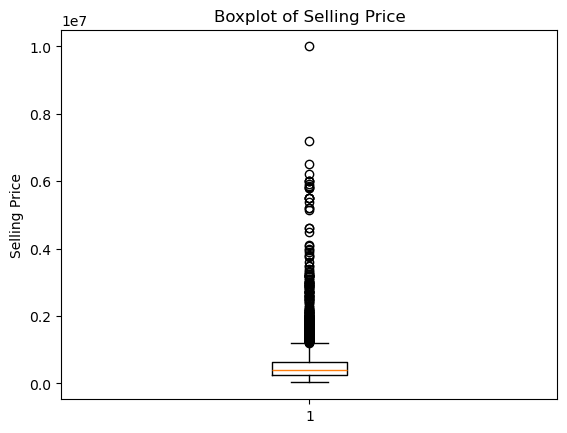

In [55]:
# Using boxplot to visualize outliers which can lead to biased coefficients and worse predictions for normal cases.
import matplotlib.pyplot as plt

plt.boxplot(df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.ylabel('Selling Price')
plt.show()


In [56]:
#Setting realistic selling prices to avoid biased coefficients and poor prediction in the model
df_clean = df[(df['selling_price'] >= 10000) & (df['selling_price'] <= 5000000)]

print("Original rows:", df.shape[0])
print("Rows after removing extreme prices:", df_clean.shape[0])


Original rows: 6926
Rows after removing extreme prices: 6906


In [57]:
# Standardize column names
df.columns = df.columns.str.lower()         
df.columns = df.columns.str.replace(' ', '_')  

print(df.columns)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'car_age'],
      dtype='object')


In [58]:
# Remove non-numeric characters (like 'bhp') and convert to float
df['max_power'] = df['max_power'].str.extract(r'(\d+\.?\d*)')  # extract numeric part
df['max_power'] = df['max_power'].astype(float)                 # convert to float

# Check for any remaining missing values
print(df['max_power'].isna().sum())


206


In [59]:
df['max_power']=df['max_power'].fillna(df['max_power'].median())

In [60]:
# Fill missing seats with the mode
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])


In [61]:
df['engine'] = df['engine'].fillna(df['engine'].median())


In [62]:
df['price_per_kilometer']=df['selling_price']/df['mileage(km/ltr/kg)']
print (df.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

   max_power  seats  car_age  price_per_kilometer  
0      74.00    5.0       11         19230.769231  
1     103.52

In [63]:
# Reset the index and drop the old one
df.reset_index(drop=True, inplace=True)

# Check the result
print(df.head())
print(df.index)


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

   max_power  seats  car_age  price_per_kilometer  
0      74.00    5.0       11         19230.769231  
1     103.52

In [64]:
# Save cleaned DataFrame to a CSV file
df.to_csv('cleaned_cars.csv', index=False)


In [65]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_kilometer
count,6926.000000,6.926000e+03,6.926000e+03,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6.926000e+03
mean,2013.420300,5.172707e+05,7.399568e+04,19.463912,1425.398787,87.551527,5.421600,11.579700,inf
std,4.078286,5.197670e+05,5.835810e+04,3.987884,487.026967,31.311523,0.972171,4.078286,NaN
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000,5.000000,1.544896e+03
25%,2011.000000,2.500000e+05,4.000000e+04,16.950000,1197.000000,68.000000,5.000000,8.000000,1.216347e+04
50%,2014.000000,4.000000e+05,7.000000e+04,19.418783,1248.000000,81.830000,5.000000,11.000000,2.051165e+04
75%,2017.000000,6.335000e+05,1.000000e+05,22.320000,1498.000000,99.000000,5.000000,14.000000,3.216504e+04
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,42.000000,inf


#### Exploratory Data Analysis

In [66]:
#Average selling price of cars in the dataset
Mean_selling_price =np.mean(df['selling_price'])
print (Mean_selling_price)

517270.6784579844


In [67]:
Common_fuel_type = df['fuel'].mode()[0]
print(Common_fuel_type)

Diesel


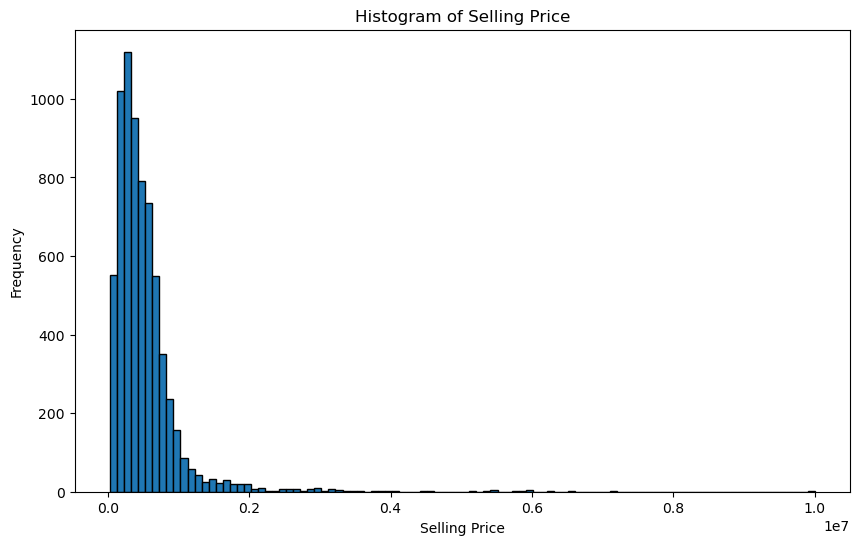

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['selling_price'], bins=100, edgecolor='black')
plt.title('Histogram of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


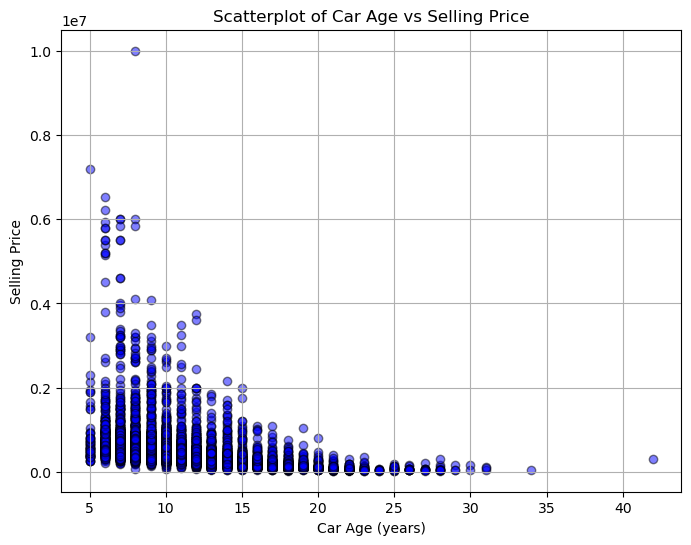

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(df['car_age'], df['selling_price'], alpha=0.5, c='blue', edgecolors='k')
plt.title('Scatterplot of Car Age vs Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


In [70]:
avg_price_by_fuel = df.groupby('fuel')['selling_price'].mean()

print(avg_price_by_fuel)


fuel
CNG       300499.946429
Diesel    639727.768842
LPG       200421.052632
Petrol    375688.966526
Name: selling_price, dtype: float64


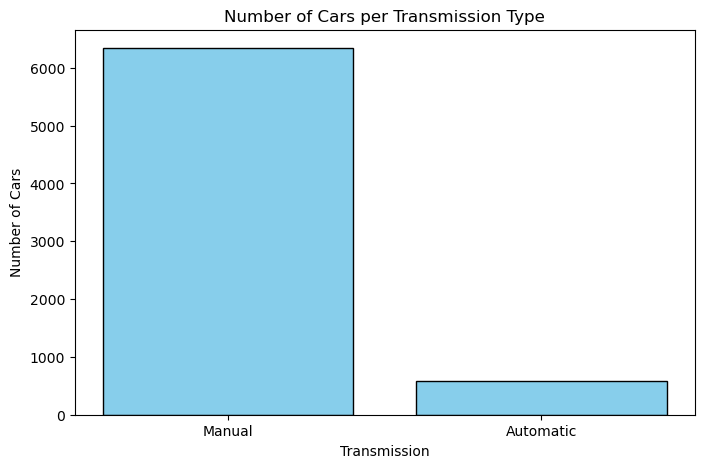

In [71]:
# Count cars per transmission
transmission_counts = df['transmission'].value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(transmission_counts.index, transmission_counts.values, color='skyblue', edgecolor='black')
plt.title('Number of Cars per Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Number of Cars')
plt.show()


In [72]:
car_max_mileage = df.loc[df['mileage(km/ltr/kg)'].idxmax(), 'name']
print (car_max_mileage)

Volvo XC90 T8 Excellence BSIV


In [73]:
corr = df['mileage(km/ltr/kg)'].corr(df['selling_price'])
print("Correlation between mileage and selling price:", corr)


Correlation between mileage and selling price: -0.10728200874810075


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926 entries, 0 to 6925
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 6926 non-null   object 
 1   year                 6926 non-null   int64  
 2   selling_price        6926 non-null   int64  
 3   km_driven            6926 non-null   int64  
 4   fuel                 6926 non-null   object 
 5   seller_type          6926 non-null   object 
 6   transmission         6926 non-null   object 
 7   owner                6926 non-null   object 
 8   mileage(km/ltr/kg)   6926 non-null   float64
 9   engine               6926 non-null   float64
 10  max_power            6926 non-null   float64
 11  seats                6926 non-null   float64
 12  car_age              6926 non-null   int64  
 13  price_per_kilometer  6926 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 757.7+ KB


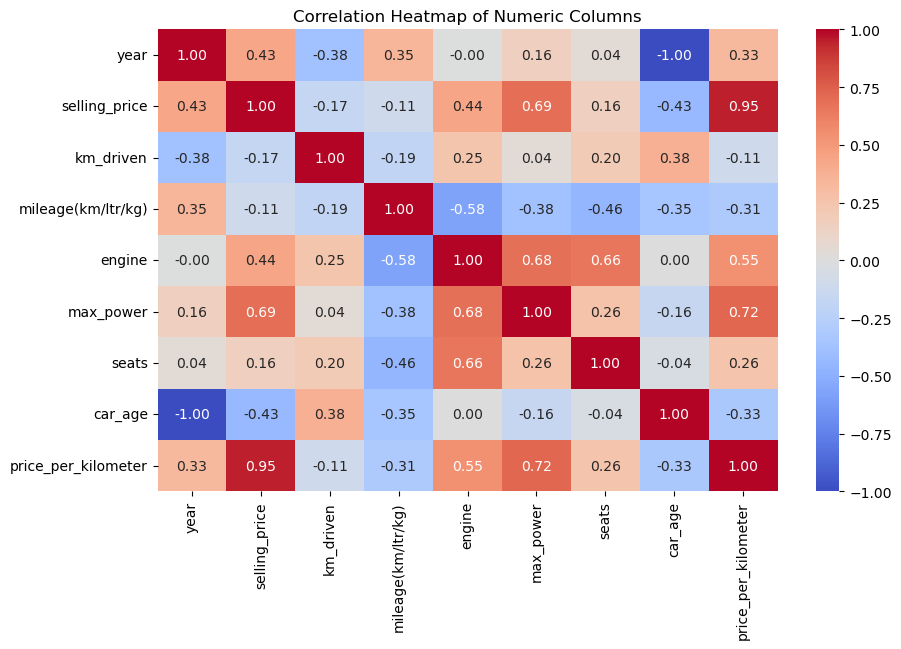

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


In [76]:
avg_price_by_transmission = df.groupby('transmission')['selling_price'].mean()

print(avg_price_by_transmission)

transmission
Automatic    1.309712e+06
Manual       4.442991e+05
Name: selling_price, dtype: float64


In [77]:
avg_price_by_year = df.groupby('year')['selling_price'].mean()

print(avg_price_by_year)

year
1983    300000.000000
1991     55000.000000
1994     88000.000000
1995    107500.000000
1996     81666.666667
1997     90181.727273
1998     73100.000000
1999     71470.588235
2000     90047.850000
2001     47220.333333
2002     99153.807692
2003     97034.021277
2004    109364.250000
2005    137994.494505
2006    164383.308943
2007    174894.505682
2008    208397.639024
2009    227691.620833
2010    273897.334211
2011    318335.696751
2012    351387.379139
2013    451501.724199
2014    511858.798623
2015    589177.625551
2016    653180.339105
2017    732419.517327
2018    866376.613487
2019    949668.547550
2020    888349.158730
Name: selling_price, dtype: float64


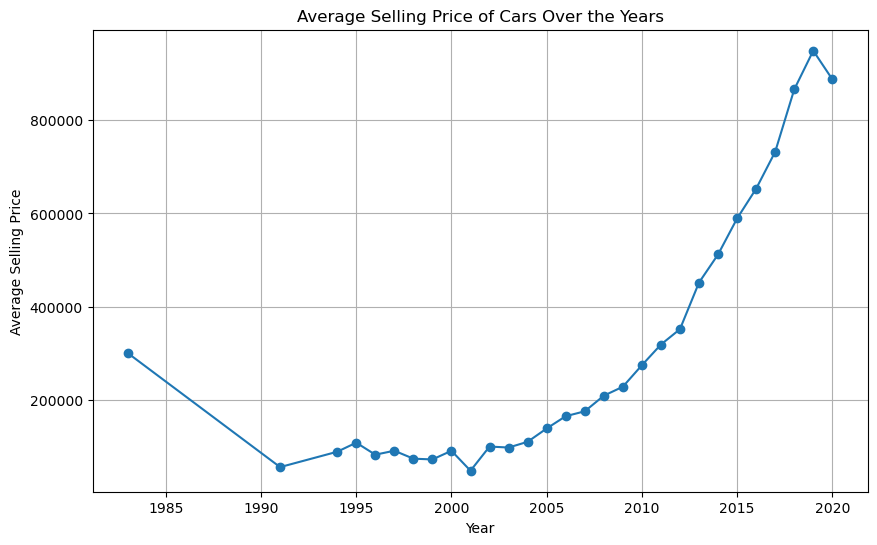

In [78]:
import matplotlib.pyplot as plt

# Calculate average selling price per year
avg_price_by_year = df.groupby("year")["selling_price"].mean()

# Plot line graph
plt.figure(figsize=(10,6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker="o")

plt.title("Average Selling Price of Cars Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.grid(True)
plt.show()


In [79]:
most_expensive_car_by_fuel_type = df.loc[df.groupby('fuel')['selling_price'].idxmax(), ['fuel', 'name', 'selling_price']]
print(most_expensive_car_by_fuel_type)


        fuel                                   name  selling_price
4977     CNG  Maruti Ertiga VXI CNG Limited Edition         545000
2689  Diesel                  BMW X7 xDrive 30d DPE        7200000
2792     LPG            Hyundai i10 Sportz 1.1L LPG         375000
170   Petrol          Volvo XC90 T8 Excellence BSIV       10000000


In [80]:
#Brand that appears most frequently
df['brand'] = df['name'].str.split().str[0]

# Find the most frequent brand
most_frequent_brand = df['brand'].value_counts().idxmax()

print("Most frequent brand:", most_frequent_brand)


Most frequent brand: Maruti


In [81]:
top5_combinations = (
    df.groupby(['fuel', 'transmission'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(5)
)

print(top5_combinations)


     fuel transmission  count
2  Diesel       Manual   3457
5  Petrol       Manual   2791
1  Diesel    Automatic    298
4  Petrol    Automatic    286
0     CNG       Manual     56


# What are the main assumptions of Linear Regression, and how can you check them using this dataset?
# Explain the assumptions (Linearity, Homoscedasticity, Normality of residuals, No multicollinearity, Independence of errors). 
#Linearity
The relationship between each feature and the target (selling_price) should be linear.

#Homoscedasticity
The residuals (differences between predicted and actual values) should have constant variance across all levels of predicted values.

#Normality of Residuals
Residuals(differences between the actual values and the predicted values) should be roughly normally distributed.

#No Multicollinearity
Features should not be too highly correlated with each other.

#Independence of Errors
Residuals(differences between the actual values and the predicted values) should not be correlated (especially in time series data).



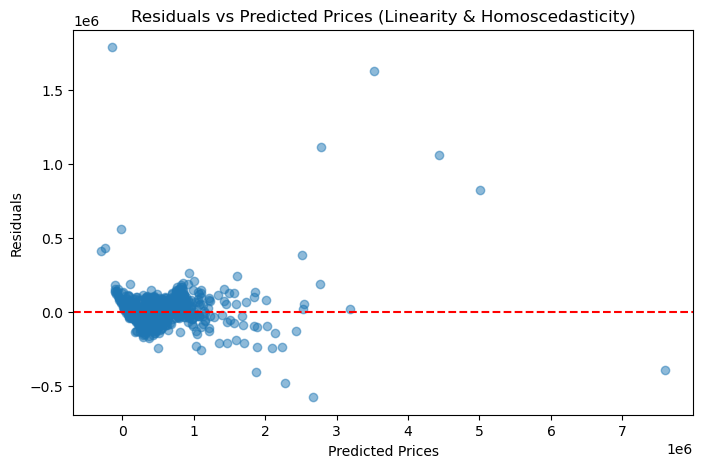

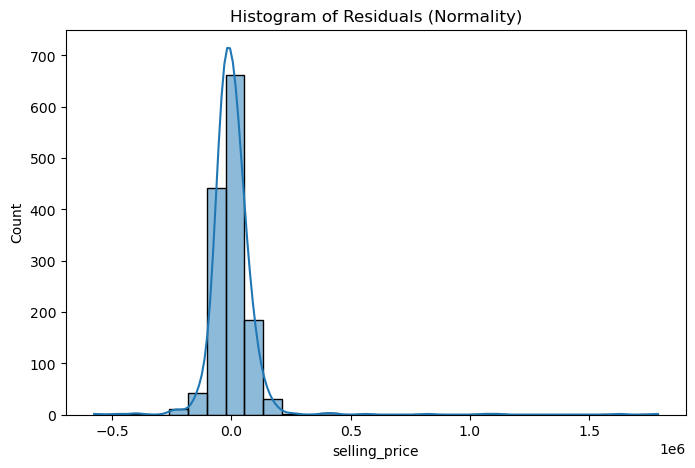

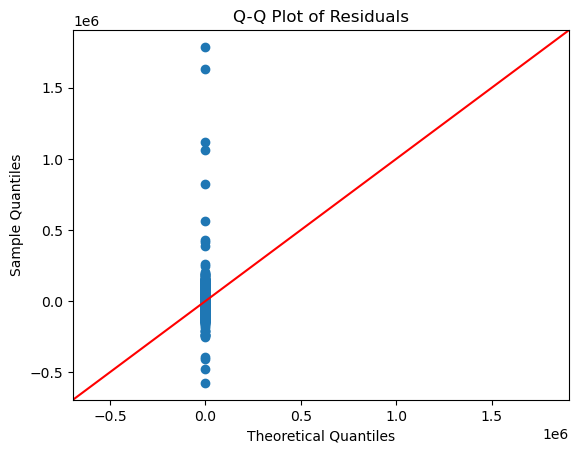

Variance Inflation Factor (VIF):
                 Feature       VIF
0              km_driven  1.489368
1     mileage(km/ltr/kg)  2.935771
2                 engine  5.451179
3              max_power  3.296382
4                  seats  2.235971
5                car_age  1.777971
6    price_per_kilometer  2.679331
7           fuel_encoded  2.178105
8          brand_encoded  1.070079
9    seller_type_encoded  1.092968
10  transmission_encoded  1.447605


In [101]:
#code to verify at least three of these assumptions using visualizations or statistics.
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# --- Assuming X_train, X_test, y_train, y_test are already defined ---
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# 1. Linearity & Homoscedasticity
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices (Linearity & Homoscedasticity)")
plt.show()

# 2. Normality of Residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals (Normality)")
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

# 3. Multicollinearity
X_train_const = sm.add_constant(X_train)  # Add intercept for VIF calculation
vif = pd.DataFrame()
vif["Feature"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train_const.values, i+1) for i in range(len(X_train.columns))]
print("Variance Inflation Factor (VIF):")
print(vif)

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fuel_encoded'] = le.fit_transform(df['fuel'])


In [83]:
le = LabelEncoder()
df['brand_encoded'] = le.fit_transform(df['brand'])

In [84]:
le = LabelEncoder()
df['owner'] = le.fit_transform(df['owner'])

In [85]:
le = LabelEncoder()
df['seller_type_encoded'] = le.fit_transform(df['seller_type'])

In [86]:
le = LabelEncoder()
df['transmission_encoded'] = le.fit_transform(df['transmission'])

In [87]:
df = df.drop(columns=['name','brand','fuel','owner','seller_type','transmission','year'])

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
x = df.drop('selling_price', axis=1)
y = df['selling_price']

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [90]:
import numpy as np

# Checking for NaN or inf values
print(np.any(np.isnan(x_train)))  
print(np.any(np.isinf(x_train)))  
# Replacing  the NANs
x_train = x_train.replace([np.inf, -np.inf], np.nan)  
x_train = x_train.fillna(0)  
x_test = x_test.replace([np.inf, -np.inf], np.nan)
x_test = x_test.fillna(0)

#Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


False
True


LinearRegression()

In [91]:
# Getting the model intercept and the coefficients
print("Intercept:", model.intercept_)

for feature, coef in zip(x_train.columns, model.coef_):
    print(f"{feature}: {coef}")


Intercept: -51375.017548287986
km_driven: -0.1999126956092478
mileage(km/ltr/kg): 17645.314955714955
engine: -39.77012492174278
max_power: 1631.9094400233332
seats: -6995.43279824749
car_age: -8347.3565149844
price_per_kilometer: 13.443840823772792
fuel_encoded: -19564.435862864037
brand_encoded: -1182.7389182914787
seller_type_encoded: -23760.875316733338
transmission_encoded: -17999.894419800235


In [92]:
#Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mse))

R² Score: 0.947961212527321
Mean Squared Error: 11413231587.20532
Mean Absolute Error: 53810.79822992055
Root Mean Squared Error: 106832.72713548654


# R_squared score = 0.9476 mean that my model was able to explain  95% of the variance in the model  which means it was trained properly
# MSE = 11413231587.20532 means that this was the average squared between the predicted and actual values

In [93]:
# Replacing and filling the infinities and NANs
import numpy as np

df = df.replace([np.inf, -np.inf], np.nan)

df = df.fillna(0)  


In [94]:
#Using lasso regression to assist with overfitting of the model on the data set
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = df.drop(columns=['selling_price']) 
y = df['selling_price']

# 2. Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=1.0) 
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Lasso Regression Results")
print("R² Score:", r2)
print("MSE:", mse)

Lasso Regression Results
R² Score: 0.947961074479544
MSE: 11413261864.06852


There was not much difference between the performance of Lasso Regression and our original Linear Regression model. This means that Lasso did not shrink any coefficients to zero, suggesting that our dataset does not contain irrelevant features. Lasso is particularly useful when we have many predictors, as it can remove irrelevant ones by setting their coefficients to zero, but in our case, all features appear to contribute to the model.

In [95]:
# Ridge regression to assist with overfitting of the model
X = df.drop(columns=['selling_price']) 
y = df['selling_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Ridge Regression Results")
print("R² Score:", r2)
print("MSE:", mse)


Ridge Regression Results
R² Score: 0.9479609527523275
MSE: 11413288561.479822


There was not much difference between the performance of Ridge Regression and our original Linear Regression model. This means that Ridge did not need to significantly shrink the coefficients, which suggests that the model was already well-regularized and not overfitting. Ridge is especially useful when predictors are highly correlated, as it distributes the weights more evenly across them. In our case, since results were similar, multicollinearity or overfitting was not a major issue

In [96]:
#Performing cross validation
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

X = df.drop(columns=['selling_price'])
y = df['selling_price']

# Initialize Ridge Regression
ridge = Ridge(alpha=1.0)
cv_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')

print("Cross-validation R² scores:", cv_scores)
print("Mean R² score:", np.mean(cv_scores))
print("Standard Deviation of R²:", np.std(cv_scores))


Cross-validation R² scores: [0.8999971  0.93135104 0.95747692 0.96223542 0.91421045]
Mean R² score: 0.9330541878340126
Standard Deviation of R²: 0.02407808994894336


# This means that the Ridge Regression model generalizes well, performing consistently across different data splits, and cross-validation confirms its reliability on unseen data.

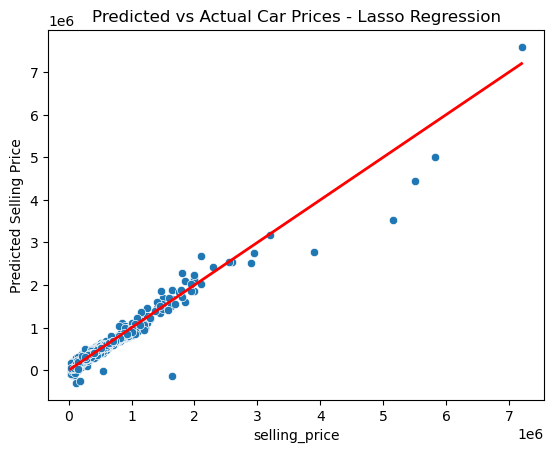

In [97]:
#Plotting predicted vs actual values for lasso regression
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  
plt.ylabel("Predicted Selling Price")
plt.title("Predicted vs Actual Car Prices - Lasso Regression")
plt.show()


In [98]:
#Using GridSearchCV to find the best alpha value for Ridge Regression.
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
ridge = Ridge()

# Define a grid of alpha values to search
alpha_values = {'alpha': [0.01, 0.1, 1.0, 10, 50, 100]}

# Use GridSearchCV for 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid=alpha_values, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best alpha
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Train Ridge with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)
y_pred_ridge = ridge_best.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)

print("Ridge Regression Results with best alpha")
print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)


Best alpha: 100
Ridge Regression Results with best alpha
R² Score: 0.9479296544203976
MSE: 11420152962.592108
RMSE: 106865.11574219207


# The Ridge Regression model generalizes well in that it explains 95% of the variance, and even with strong regularization (alpha = 100), the errors (RMSE) are reasonable given the scale of car prices.

In [99]:
#Trying Polynomial Regression on the dataset.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop(columns=['selling_price'])
y = df['selling_price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Linear Regression on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluation
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("Polynomial Regression (degree=2) Results")
print("R² Score:", r2_poly)
print("RMSE:", rmse_poly)


Polynomial Regression (degree=2) Results
R² Score: 0.9943422316797224
RMSE: 35225.99833647499


# polynomial regression was useful because it captured non-linear relationships in the data set

In [100]:
# My best performing model was the polynomial regression model  as it captured nonlinear relationships between car features and selling price that linear, Lasso, and Ridge models couldn’t capture